In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import requests
import json
import time
import itertools
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## ARIMA

El método ARIMA (Autoregressive Integrated Moving Average) es un modelo estadístico que se utiliza para predecir series temporales. ARIMA es un modelo de series temporales de autorregresiva integrado de media móvil, que se utiliza para modelar series temporales que no son estacionarias.
El modelo ARIMA se basa en la idea de que los valores de una serie temporal están influenciados por los valores anteriores de la serie.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Cargar los datos y ajustar la serie de tiempo
df = pd.read_csv("demanda_nacional.csv")
df["Fecha"] = pd.to_datetime(df["Fecha"], format='%Y-%m-%d')
df = df.set_index("Fecha")
df = df.asfreq("D")
df = df.sort_index()
series = df[:4383]

# Entrenar el modelo ARIMA
model = ARIMA(series, order=(5, 1, 0))  # (p, d, q) = (5, 1, 0)
model_fit = model.fit()

# Realizar las predicciones para los siguientes 30 valores
future_predictions = model_fit.get_forecast(steps=30)
pred_ci = future_predictions.conf_int()


In [3]:
r2 = r2_score(df[4384:4414], future_predictions.predicted_mean)
r2

-3.4745536049714554

In [4]:
mae = mean_absolute_error(df[4384:4414], future_predictions.predicted_mean)
mae

133.34681556912304

In [5]:
mse = mean_squared_error(df[4384:4414], future_predictions.predicted_mean)
mse

21875.521900082113

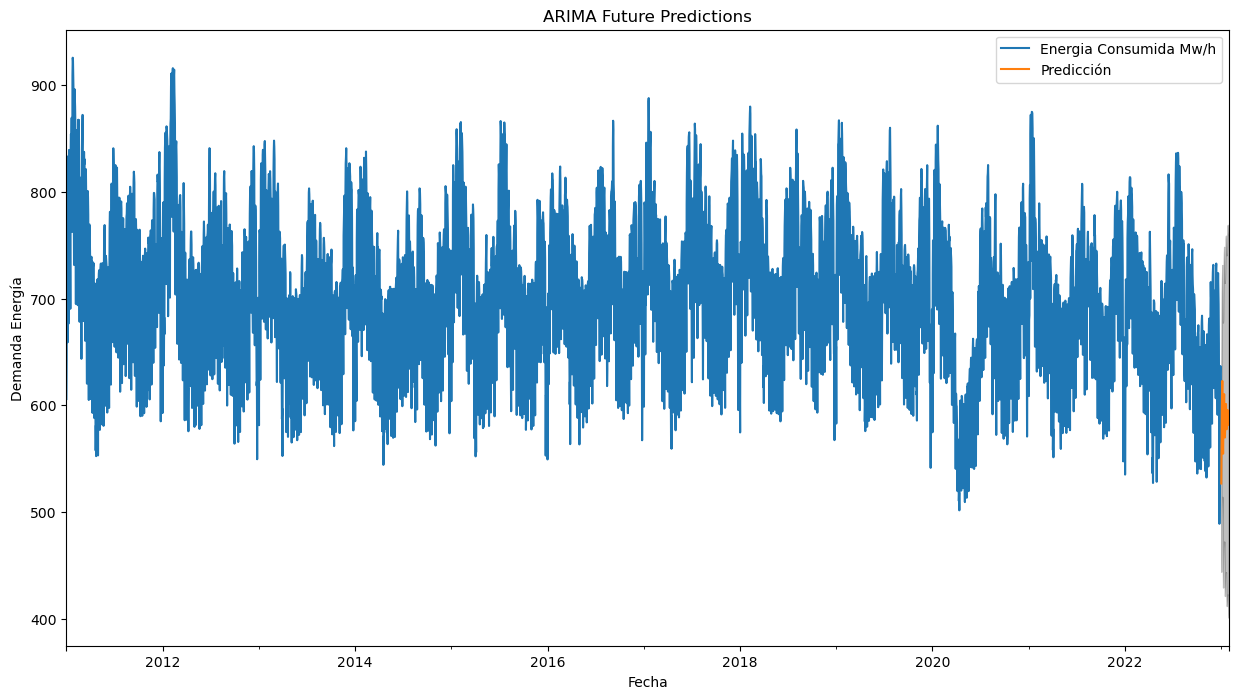

In [6]:
ax = series.plot(label = 'Valores reales', figsize = (15, 8))

future_predictions.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda Energía')
plt.title('ARIMA Future Predictions')

plt.legend()
plt.savefig("predict_arima.png")
plt.show()

In [7]:
demanda_nacional_23 = df[4383:]

serie_futura = demanda_nacional_23["Energia Consumida Mw/h"]

In [8]:
future_predictions2 = model_fit.get_forecast(steps=233)
pred_ci = future_predictions2.conf_int()

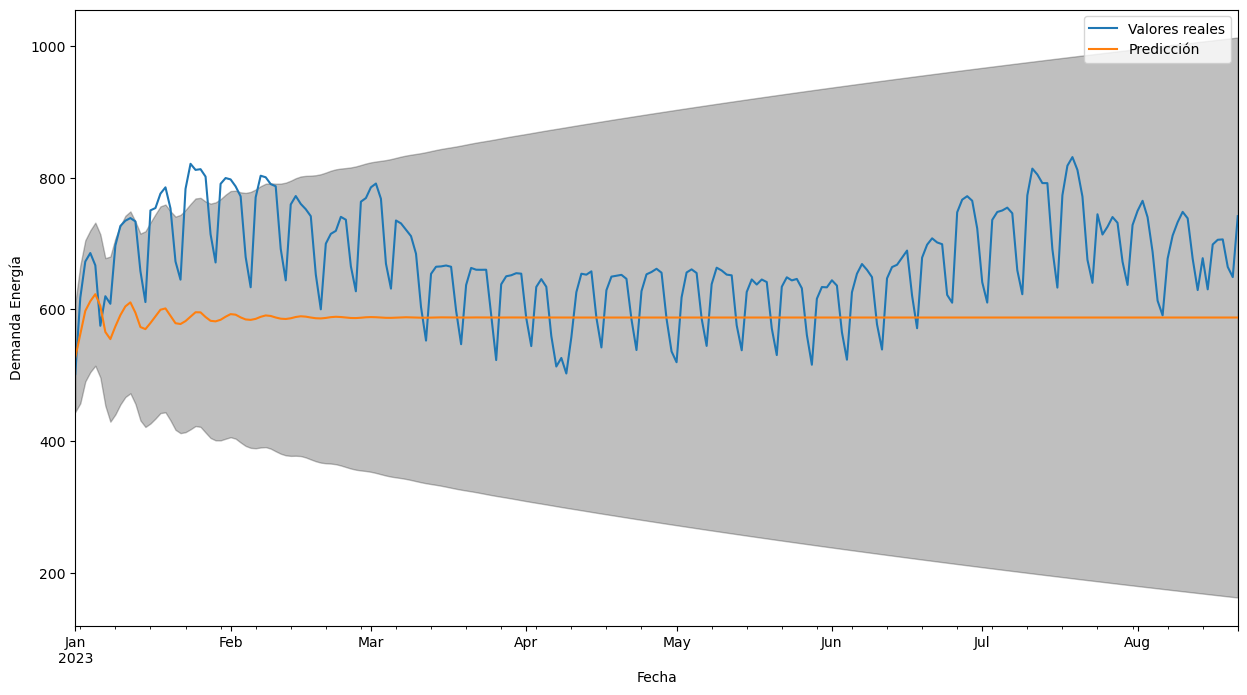

In [9]:
ax = serie_futura.plot(label = 'Valores reales', figsize = (15, 8))

future_predictions2.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda Energía')

plt.legend()
plt.savefig("predict23_arima.png")
plt.show()

In [10]:
future_predictions2.predicted_mean.to_csv('demanda_nacional_arima.csv', index=False)

In [ ]:
########################################################################################

## SARIMA

In [ ]:
El método SARIMA (Seasonal Autoregressive Integrated Moving Average) es un modelo estadístico que se utiliza para predecir 
series temporales con patrones estacionales.
El modelo SARIMA se basa en el modelo ARIMA, pero también tiene en cuenta la estacionalidad de la serie temporal.
En comparación con el modelo ARIMA, el modelo SARIMA es más complejo de ajustar y tiene más parámetros que ajustar. 
Sin embargo, el modelo SARIMA suele ser más preciso para predecir series temporales con patrones estacionales.

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Cargar los datos y ajustar la serie de tiempo
df = pd.read_csv("demanda_nacional.csv")
df["Fecha"] = pd.to_datetime(df["Fecha"], format='%Y-%m-%d')
df = df.set_index("Fecha")
df = df.asfreq("D")
df = df.sort_index()
series = df[:4383]

# Entrenar el modelo SARIMA
order = (5, 1, 0)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Realizar las predicciones para los siguientes 30 valores
future_predictions = model_fit.get_forecast(steps=30)

# Obtener las predicciones y los intervalos de confianza
predictions = future_predictions.predicted_mean
pred_ci = future_predictions.conf_int()

# Imprimir las predicciones futuras
print("Predicciones futuras:", predictions)


Predicciones futuras: 2023-01-01    514.886643
2023-01-02    555.398638
2023-01-03    591.554435
2023-01-04    597.995504
2023-01-05    606.575559
2023-01-06    579.349531
2023-01-07    527.432129
2023-01-08    521.961083
2023-01-09    553.768536
2023-01-10    575.490582
2023-01-11    585.278657
2023-01-12    590.758780
2023-01-13    569.118266
2023-01-14    538.245079
2023-01-15    534.744981
2023-01-16    551.440604
2023-01-17    565.170827
2023-01-18    572.083092
2023-01-19    573.330583
2023-01-20    561.265732
2023-01-21    545.379302
2023-01-22    547.249429
2023-01-23    554.351425
2023-01-24    559.281965
2023-01-25    566.217262
2023-01-26    567.098938
2023-01-27    555.767498
2023-01-28    546.783782
2023-01-29    550.630608
2023-01-30    554.172421
Freq: D, Name: predicted_mean, dtype: float64


In [12]:
r2 = r2_score(df[4384:4414], future_predictions.predicted_mean)
r2

-5.033956231920331

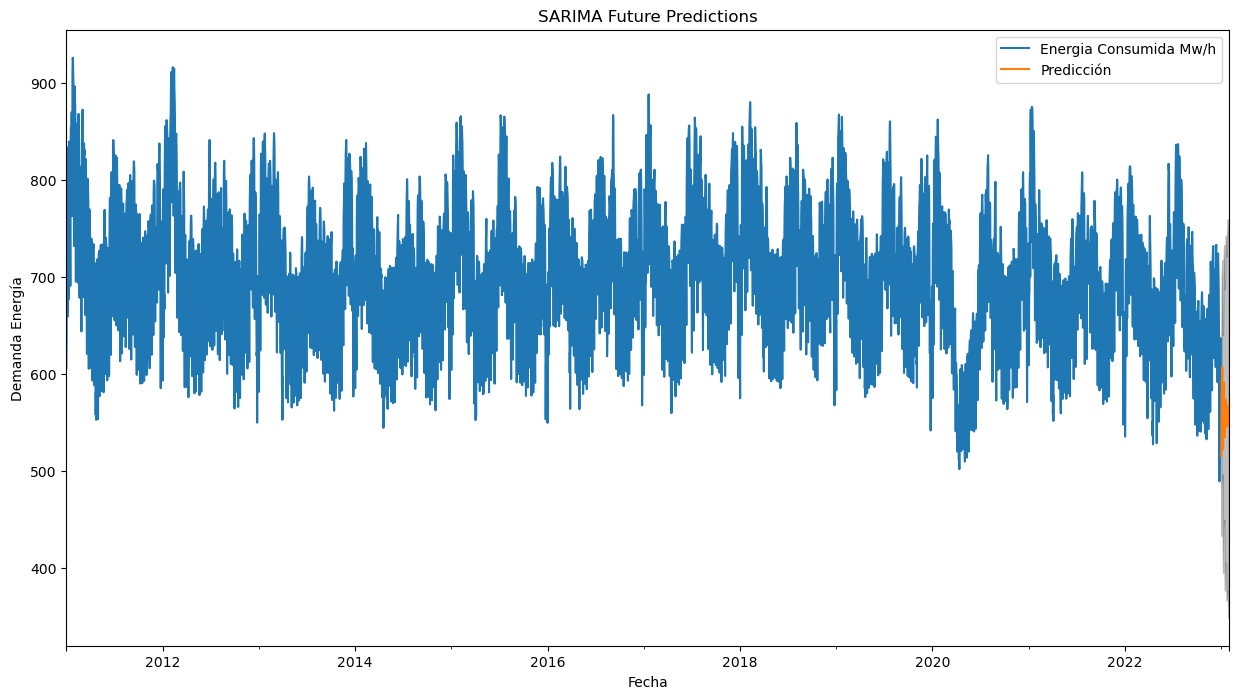

In [13]:
# Graficar las predicciones y los intervalos de confianza

ax = series.plot(label = 'Valores reales', figsize = (15, 8))

future_predictions.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda Energía')
plt.title('SARIMA Future Predictions')

plt.legend()
plt.savefig("predict_sarima.png")
plt.show()

In [14]:
future_predictions2 = model_fit.get_forecast(steps=233)
pred_ci = future_predictions2.conf_int()

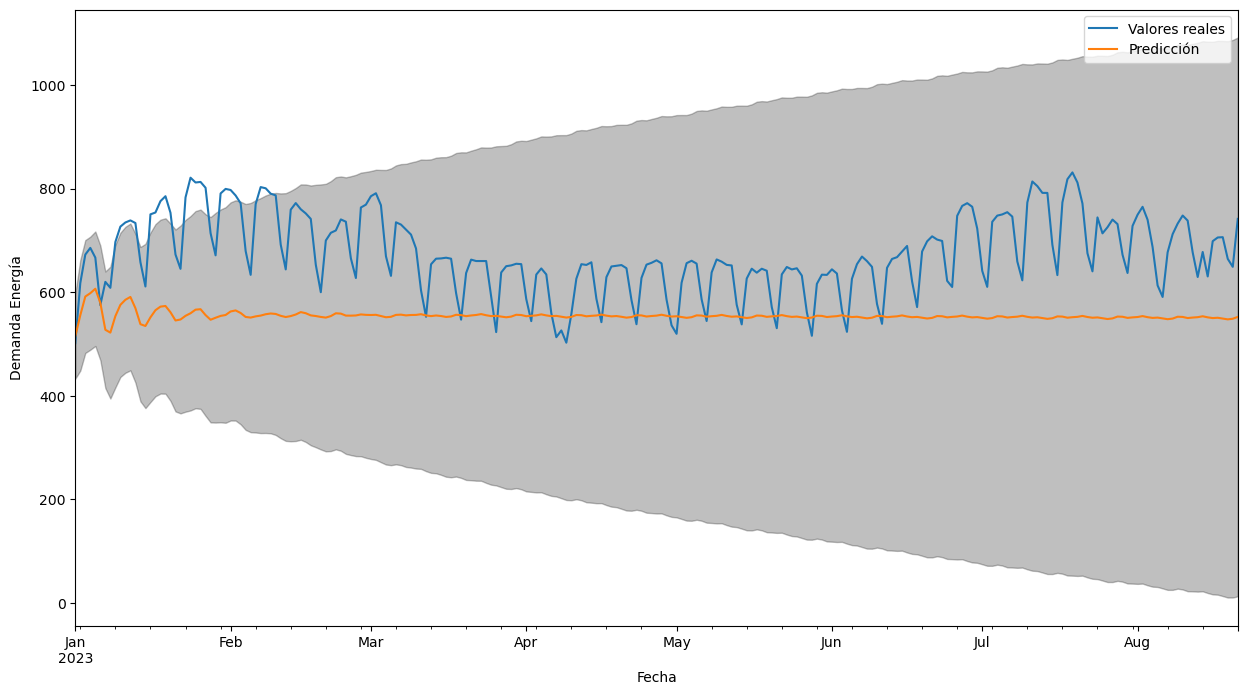

In [15]:
ax = serie_futura.plot(label = 'Valores reales', figsize = (15, 8))

future_predictions2.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda Energía')

plt.legend()
plt.savefig("predict23_sarima.png")
plt.show()

In [16]:
future_predictions2.predicted_mean.to_csv('demanda_nacional_sarima.csv', index=False)